In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
import sys
!{sys.executable} -m pip install xgboost

In [92]:
import xgboost as xgb

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [94]:
bike = pd.read_csv('../Datasets/bikesharing.csv')

In [95]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [96]:
X = bike.drop('cnt', axis=1).values
y= bike['cnt'].values

In [97]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [98]:
reg = xgb.XGBRegressor(objective='reg:linear', max_depth=4, n_estimators=50)

In [99]:
reg.fit(X_train, y_train)

[10:00:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [100]:
pred1 = reg.predict(X_test)
print ( 'RMSE:',np.sqrt(MSE(y_test, pred1)))

RMSE: 52.11494822890218


In [101]:
#Nun schauen wir uns an wie der lineare XGBoost Funktioniert für Regression

In [102]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label = y_test)

In [103]:
params = {'booster': 'gblinear', 'objective': 'reg:linear'}

In [104]:
xgb_linreg = xgb.train(params=params, dtrain=DM_train, num_boost_round=40)

[10:00:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [123]:
xgb_linreg

In [105]:
pred2 = xgb_linreg.predict(DM_test)

In [106]:
print('RMSE:',np.sqrt(MSE(y_test, pred2)))

RMSE: 178.31874772443945


In [107]:
cv_linreg= xgb.cv(params=params, dtrain=DM_train, nfold=3, num_boost_round=50, metrics='rmse', as_pandas=True, seed=123)

[10:00:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [108]:
cv_linreg['test-rmse-mean'].tail(1).values[0]

175.43394898614756

In [109]:
params2= {'objective': 'reg:linear', 'max_detph': 4}

In [110]:
xgb_cv= xgb.cv(params=params2, nfold=3, num_boost_round=40, metrics='rmse', as_pandas=True, dtrain=DM_train)

[10:00:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_detph" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:00:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_detph" } might not be used.

  This could be a false alarm, with some parameters getting used by language b

In [111]:
xgb_cv['test-rmse-mean'].tail(1).values[0]

52.10350049912441

In [112]:
auto = pd.read_csv('../Datasets/atuo-mpg.csv')

In [113]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [114]:
Xauto = auto.drop(['origin', 'mpg'], axis=1).values
yauto  = auto['mpg'].values

In [115]:
Dauto = xgb.DMatrix(data=Xauto, label=yauto)

In [116]:
params = {'objective': 'reg:linear', 'max_depth': 3}

l1_params = [1,10,100,300]
res = []

for l1 in l1_params:
    params['alpha'] = l1
    cv2 = xgb.cv(dtrain=Dauto,params=params, nfold=3, metrics='rmse', as_pandas=True, num_boost_round=50)
    res.append(cv2['test-rmse-mean'].tail(1).values[0])
    

[10:00:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

In [117]:
print(pd.DataFrame(list(zip(l1_params, res)) , columns=['l1', 'rmse']))

    l1      rmse
0    1  4.205134
1   10  4.115571
2  100  4.148336
3  300  4.679659


In [118]:
params3 = {'objective': 'reg:linear', 'max_depth': 4}
lamda= [1,10,100,200,500]
res3= []
for f in lamda:
    params3['lambda']= f
    cv3 = xgb.cv(dtrain=Dauto, num_boost_round=50, nfold=3, params=params3, as_pandas=True, metrics='rmse')
    res3.append(cv3['test-rmse-mean'].tail(1).values[0])
print(pd.DataFrame(list(zip(lamda, res3)), columns=['lamda', 'rmse']))

[10:00:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

In [119]:
params = {'objective': 'reg:linear', 'max_depth': 2}

In [120]:
xg_reg = xgb.train(dtrain=Dauto, params=params, num_boost_round=30)

[10:00:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [121]:
pred4 = xg_reg.predict(Dauto)

ImportError: You must install graphviz to plot tree

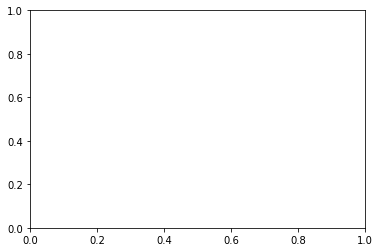

In [122]:
xgb.plot_tree(xg_reg, num_trees=1)

In [ ]:
pip install graphviz
python -c "import graphviz"